In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# autoregressive_lstm

In [2]:
import os

import numpy as np
import torch
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils, gaze_modeling

In [45]:
users, tasks, user_task_paths = data_utils.get_user_task_paths()
sequences_X, sequences_Y = data_utils.load_sequences_X_Y(users[:2], tasks, user_task_paths, window_size=1, use_update_frames=True)
len(sequences_X), len(sequences_Y)

(24, 24)

In [46]:
sequences_X[0].shape, sequences_Y[0].shape

((8093, 9), (8093, 3))

In [47]:
titles = ('eye_l', 'eye_r', 'head')
ax_names = ('x', 'y', 'z')

def plot_hist(X, bins=128):
    _, axs = plt.subplots(3, 3, figsize=(12, 8.1))
    for i, title in enumerate(titles):
        for j, ax_name in enumerate(ax_names):
            axs[i][j].hist(X[:, 3 * i + j], bins=bins)
            axs[i][j].set_title(f'{title}_{ax_name}')
    plt.tight_layout()
    plt.show()

i_sequence = 0

0


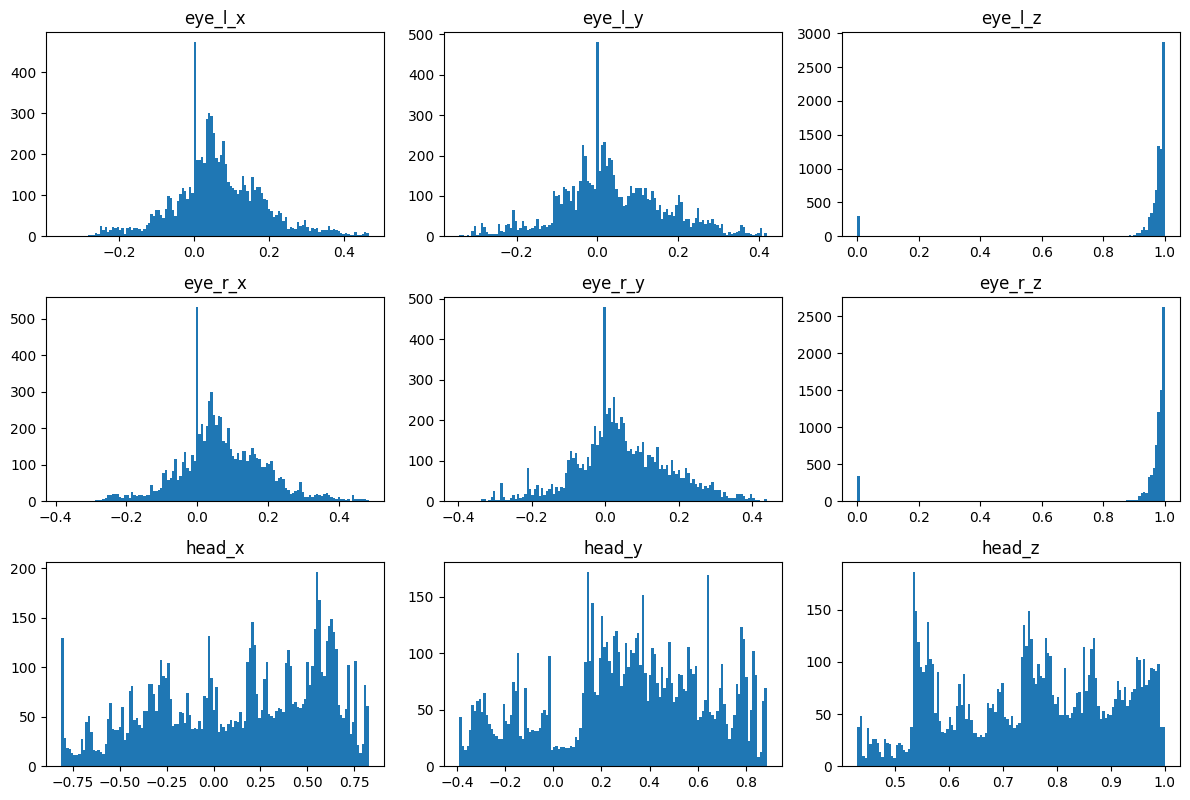

In [48]:
print(i_sequence)
plot_hist(sequences_X[i_sequence])
i_sequence += 1

## Models

In [49]:
stamp = '1726958125_lstm_vr-90hz-ds2-h32_s21'

path_weights = os.path.join('output', stamp, 'val_best.pth')
model = gaze_modeling.GazeLSTM(9, hidden_sizes=[32])
weights = torch.load(path_weights, weights_only=True)
model.load_state_dict(weights)
model

GazeLSTM(
  (lstm): LSTM(9, 32)
  (net): Sequential(
    (0): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [50]:
X_i = torch.tensor(sequences_X[i_sequence]).unsqueeze(1)
X_i.shape

torch.Size([8096, 1, 9])

In [52]:
hn, cn = None, None
for _ in range(3):
    with torch.no_grad():
        _, hn, cn = model(torch.tensor(X_i[10]))
    print(hn)
    print(cn)

tensor([[-0.2134,  0.1414, -0.1519, -0.1038,  0.1483, -0.1276,  0.0505, -0.1461,
          0.2036, -0.0385,  0.2610, -0.0830,  0.0039, -0.1054,  0.1679,  0.1757,
         -0.0638, -0.0190,  0.0621,  0.0699,  0.0760, -0.2045,  0.1303,  0.1063,
          0.1130,  0.0078, -0.0726,  0.2146,  0.0365, -0.1698,  0.1114, -0.1020]])
tensor([[-0.3807,  0.2209, -0.2325, -0.1376,  0.2382, -0.2019,  0.0786, -0.2698,
          0.3730, -0.0624,  0.3219, -0.1332,  0.0061, -0.1614,  0.3249,  0.2931,
         -0.0951, -0.0305,  0.1209,  0.1173,  0.1293, -0.3599,  0.2198,  0.1836,
          0.1849,  0.0115, -0.1386,  0.2722,  0.0545, -0.3080,  0.1877, -0.1595]])
tensor([[-0.2134,  0.1414, -0.1519, -0.1038,  0.1483, -0.1276,  0.0505, -0.1461,
          0.2036, -0.0385,  0.2610, -0.0830,  0.0039, -0.1054,  0.1679,  0.1757,
         -0.0638, -0.0190,  0.0621,  0.0699,  0.0760, -0.2045,  0.1303,  0.1063,
          0.1130,  0.0078, -0.0726,  0.2146,  0.0365, -0.1698,  0.1114, -0.1020]])
tensor([[-0.3807,  0.2

C:\Users\Brown Research\AppData\Local\Temp\ipykernel_39916\98076352.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  _, hn, cn = model(torch.tensor(X_i[10]))


In [42]:
Y_hat_i = list()
y_hatn = None
for t, x in enumerate(X_i):
    if y_hat is not None:
        x[:, -3:] = y_hat[0]
    with torch.no_grad():
        y_hat, hn, cn = model(x, h0=hn, c0=cn)
    Y_hat_i.append(y_hat[0].detach().numpy())

Y_hat_i = np.array(Y_hat_i)
Y_hat_i.shape

(8096, 3)

In [43]:
Y_i = sequences_Y[i_sequence]
Y_i.shape

(8096, 3)

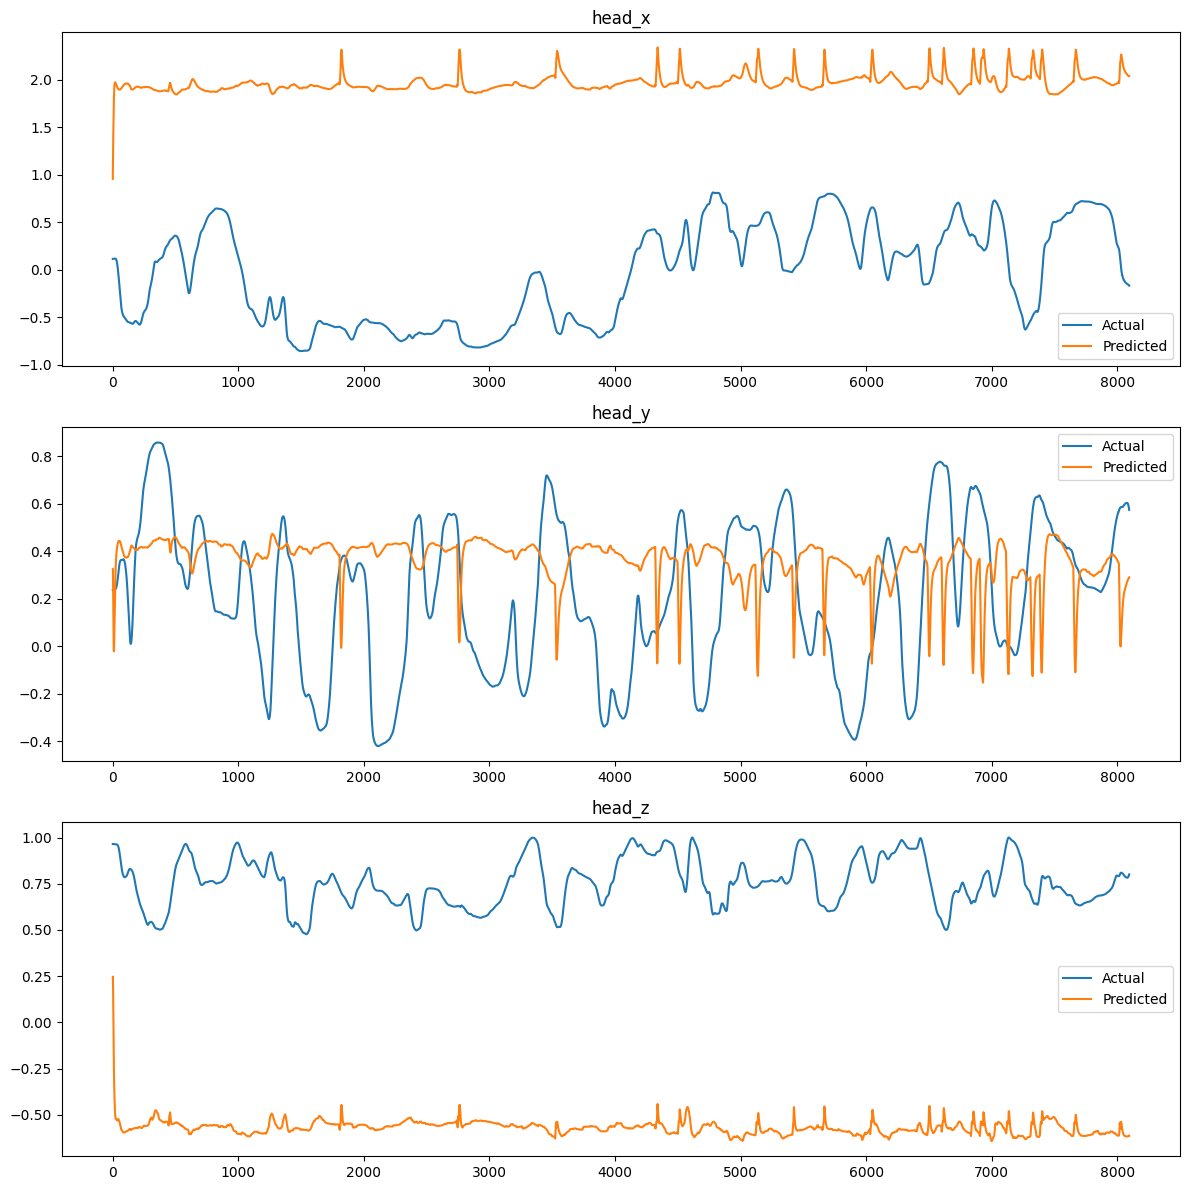

In [44]:
_, axes = plt.subplots(3, 1, figsize=(12, 12))
for j, ax_name in enumerate(ax_names):
    axes[j].plot(Y_i[:, j], label='Actual')
    axes[j].plot(Y_hat_i[:, j], label='Predicted')
    axes[j].legend()
    axes[j].set_title(f'head_{ax_name}')
plt.tight_layout()
plt.show()